In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Content of This Notebook

1. [Introduction](#1)
1. [Granger Causality Test](#2)
1. [Augmented Dickey–Fuller Test](#3)
1. [Z Score Normalization](#4)
1. [VAR Model and Predictions](#5)
1. [Sources that I Utilized During Preparation](#6)

<a id='1'></a>
# Introduction

**Warning:** The arguments in this part, have been written according to my knowledge. It may contain wrong, biased, and/or missing arguments.

Global warming is a serious problem. The modern technology that we built is doing an amazing job to meet the needs of that many people. However, to do that, it needs an energy source and petroleum is by far the most efficient one. On the other hand, CO2 emission resulting from petroleum usage is threatening. Because increased CO2 in the atmosphere, absorbs the sunbeams then reflects all the angles and that results in an increase in the temperature of the atmosphere. These facts are not new. But until these days we did not see the serious outcomes of this process. Today, we started to see considerable changes yet we are still using the petroleum because, 

1. Per energy it provides, it is the cheapest.
2. It can be transported in big amounts (unlike electricity, we don't have batteries that are capable to store an equivalent amount of energy.)
3. Petroleum market is one of the most profitable ones and to keep their values in the stock market high, they have to continue to invest in that area.
4. Changing all the technology to utilize the alternative resources is neither easy nor cheap.
5. Countries are likely to blame themselves rather than collaborate.

There are more things to consider but I think this is enough because the following arguments will be biased a bit so I think it is good to end there.

In this notebook, I will try to use Vector AutoRegression (VAR) on 2 different time series and try to construct a model for temperature increase. Hope you'll enjoy.

In [2]:
temperature_data = pd.read_csv("../input/temperature-change/Environment_Temperature_change_E_All_Data_NOFLAG.csv",parse_dates = True, encoding="ISO-8859-1")

In [3]:
temperature_data.drop(["Area Code","Months","Element Code", "Element","Unit","Months Code"], axis = 1, inplace = True)

In [4]:
temperature_data.head()

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [5]:
temperature_data = temperature_data[temperature_data.Area=="World"].drop("Area",axis = 1).T
cols = list(range(34))
temperature_data.columns = cols
temperature_data = temperature_data.reset_index()
temperature_data = temperature_data.rename(columns = {"index" : "Years"})
temperature_data["Years"] = temperature_data["Years"].apply(lambda x: x.lstrip("Y"))
temperature_data.set_index("Years", inplace = True)
temperature_data["Mean_Temperature_Increase"] = temperature_data.mean(axis = 1)
temperature_data.head()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,Mean_Temperature_Increase
Years,,,,,,,,,,,,,,,,,,,,,
1961,0.399,0.417,0.263,0.58,0.254,0.403,0.278,0.277,0.367,0.212,...,0.35,0.300,0.243,0.106,0.187,-0.016,0.22,0.207,0.201,0.220324
1962,0.104,0.417,0.218,0.58,0.279,0.403,0.027,0.277,-0.183,0.212,...,0.35,0.041,0.243,-0.084,0.187,0.143,0.22,0.034,0.201,0.168971
1963,-0.171,0.417,0.563,0.58,-0.237,0.403,0.002,0.277,-0.029,0.212,...,0.35,-0.088,0.243,0.082,0.187,0.473,0.22,0.159,0.201,0.211853
1964,-0.311,0.417,-0.409,0.58,-0.287,0.403,-0.167,0.277,-0.097,0.212,...,0.35,-0.184,0.243,-0.228,0.187,-0.284,0.22,-0.253,0.201,0.003676
1965,0.206,0.417,-0.450,0.58,-0.272,0.403,-0.574,0.277,-0.141,0.212,...,0.35,-0.329,0.243,-0.191,0.187,-0.086,0.22,-0.226,0.201,0.056882


In [6]:
population_data = pd.read_csv("../input/world-population-by-year/WorldPopulation.csv")
population_data.head()

,Year,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
0,2020,7794798739,1.05,81330639,52,4378993944,56
1,2019,7713468100,1.08,82377060,52,4299438618,56
2,2018,7631091040,1.10,83232115,51,4219817318,55
3,2017,7547858925,1.12,83836876,51,4140188594,55
4,2016,7464022049,1.14,84224910,50,4060652683,54


In [7]:
population_data = population_data[["Year", "Population"]]
population_data = population_data[(1961 <= population_data.Year) & (population_data.Year <=2019)]
population_data.set_index("Year", inplace = True)
population_data = population_data.reindex(index=population_data.index[::-1])
population_data.head()

,Population
Year,
1961,3091843507
1962,3150420795
1963,3211001009
1964,3273978338
1965,3339583597


In [8]:
temperature_data["Population"] = list(population_data.Population)

In [9]:
data = temperature_data
data = data[["Mean_Temperature_Increase","Population"]]
data.head()

,Mean_Temperature_Increase,Population
Years,,
1961,0.220324,3091843507
1962,0.168971,3150420795
1963,0.211853,3211001009
1964,0.003676,3273978338
1965,0.056882,3339583597


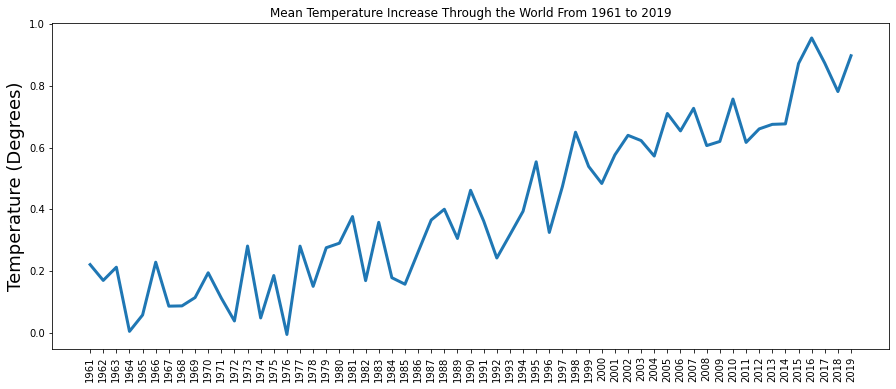

In [10]:
plt.figure(figsize = (15,6))
plt.plot(data["Mean_Temperature_Increase"], linewidth = 3)
plt.title("Mean Temperature Increase Through the World From 1961 to 2019")
plt.xticks(rotation = 90)
plt.ylabel("Temperature (Degrees)", fontsize = 18)
plt.show()


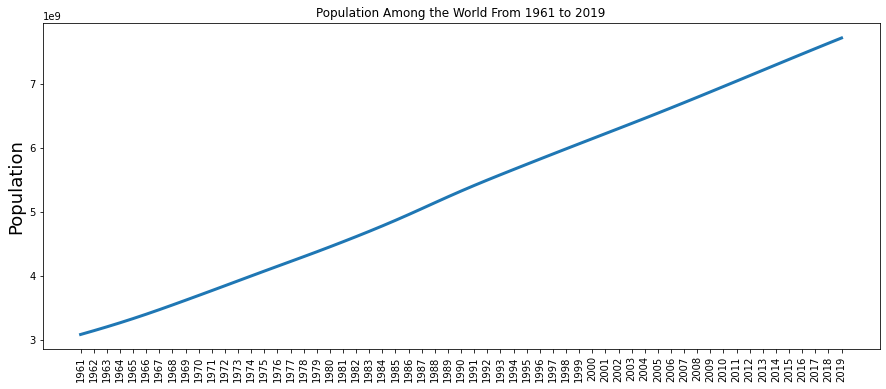

In [11]:
plt.figure(figsize = (15,6))
plt.plot(data["Population"], linewidth = 3)
plt.title("Population Among the World From 1961 to 2019")
plt.xticks(rotation = 90)
plt.ylabel("Population", fontsize = 18)
plt.show()


<a id='2'></a>
# Granger Causality Test

Granger Causality Test is used for determining whether there is a relationship between two-time series. Without using this test, we already know there is a relationship between population and temperature increase by intuition. (There are different opinions regarding this relation, but I'll keep it simple for the convenience)

In [12]:
granger_result = grangercausalitytests(data[["Mean_Temperature_Increase","Population"]], 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=44.5771 , p=0.0000  , df_denom=55, df_num=1
ssr based chi2 test:   chi2=47.0086 , p=0.0000  , df=1
likelihood ratio test: chi2=34.4287 , p=0.0000  , df=1
parameter F test:         F=44.5771 , p=0.0000  , df_denom=55, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.9738 , p=0.0000  , df_denom=52, df_num=2
ssr based chi2 test:   chi2=35.0196 , p=0.0000  , df=2
likelihood ratio test: chi2=27.3002 , p=0.0000  , df=2
parameter F test:         F=15.9738 , p=0.0000  , df_denom=52, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.4443 , p=0.0000  , df_denom=49, df_num=3
ssr based chi2 test:   chi2=35.8092 , p=0.0000  , df=3
likelihood ratio test: chi2=27.6842 , p=0.0000  , df=3
parameter F test:         F=10.4443 , p=0.0000  , df_denom=49, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.4503  , p=0.0011  , df_d

As expected, population increase correlated with temperature increase from lag 1. (p-value < 0.05)

<a id='3'></a>
# Augmented Dickey–Fuller Test

Adfuller Test is used for determining whether the data is stationary or not. In a nutshell, if p-value is smaller than 0.05, then we can conclude that the data is stationary.

In [13]:
adfuller_temp = adfuller(data.Mean_Temperature_Increase)

print("Adfuller Statistical Value: ", adfuller_temp[0])
print("P-value: ", adfuller_temp[1])
print("\n")
print("Critical Values:")
print("\n")
print("1%: ",adfuller_temp[4]["1%"])
print("5%: ", adfuller_temp[4]["5%"])
print("10%: ", adfuller_temp[4]["10%"])
print("\n**************\n")

adfuller_pop = adfuller(data.Population)

print("Adfuller Statistical Value: ", adfuller_temp[0])
print("P-value: ", adfuller_temp[1])
print("\n")
print("Critical Values:")
print("\n")
print("1%: ",adfuller_pop[4]["1%"])
print("5%: ", adfuller_pop[4]["5%"])
print("10%: ", adfuller_pop[4]["10%"])

Adfuller Statistical Value:  1.2099732305898157
P-value:  0.9960540695758707


Critical Values:


1%:  -3.5656240522121956
5%:  -2.920142229157715
10%:  -2.598014675124952

**************

Adfuller Statistical Value:  1.2099732305898157
P-value:  0.9960540695758707


Critical Values:


1%:  -3.5778480370438146
5%:  -2.925338105429433
10%:  -2.6007735310095064


P-values are much greater than 0.05. That means our data is non-stationary and we should manipulate the data so it becomes stationary. The most common way is taking first difference of the data.

In [14]:
data = data.diff().dropna()

adfuller_temp = adfuller(data.Mean_Temperature_Increase)

print("Adfuller Statistical Value: ", adfuller_temp[0])
print("P-value: ", adfuller_temp[1])
print("\n")
print("Critical Values:")
print("\n")
print("1%: ",adfuller_temp[4]["1%"])
print("5%: ", adfuller_temp[4]["5%"])
print("10%: ", adfuller_temp[4]["10%"])
print("\n**************\n")

adfuller_pop = adfuller(data.Population)

print("Adfuller Statistical Value: ", adfuller_temp[0])
print("P-value: ", adfuller_temp[1])
print("\n")
print("Critical Values:")
print("\n")
print("1%: ",adfuller_pop[4]["1%"])
print("5%: ", adfuller_pop[4]["5%"])
print("10%: ", adfuller_pop[4]["10%"])

Adfuller Statistical Value:  -4.99094935417244
P-value:  2.3126930533486127e-05


Critical Values:


1%:  -3.5656240522121956
5%:  -2.920142229157715
10%:  -2.598014675124952

**************

Adfuller Statistical Value:  -4.99094935417244
P-value:  2.3126930533486127e-05


Critical Values:


1%:  -3.5812576580093696
5%:  -2.9267849124681518
10%:  -2.6015409829867675


Now our data became stationary. We can also plot and see how it looks like after the first difference.

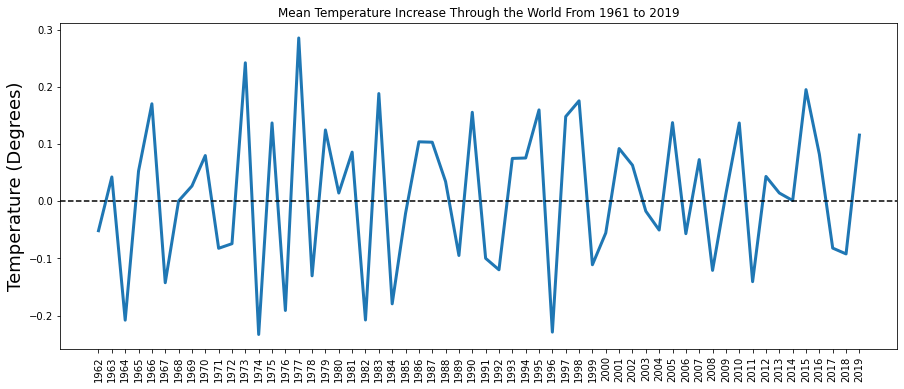

In [15]:
plt.figure(figsize = (15,6))
plt.plot(data["Mean_Temperature_Increase"], linewidth = 3)
plt.title("Mean Temperature Increase Through the World From 1961 to 2019")
plt.xticks(rotation = 90)
plt.axhline(y = 0, linestyle = "--", color = "black" )
plt.ylabel("Temperature (Degrees)", fontsize = 18)
plt.show()

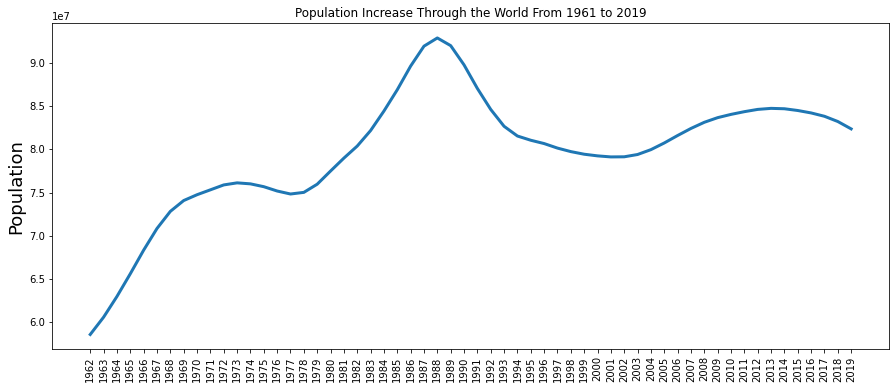

In [16]:
plt.figure(figsize = (15,6))
plt.plot(data["Population"], linewidth = 3)
plt.title("Population Increase Through the World From 1961 to 2019")
plt.xticks(rotation = 90)
plt.ylabel("Population", fontsize = 18)
plt.show()
# This plot can also be obtained from the"NetChange" column in population dataset. 

<a id='4'></a>
# Z Score Normalization

To place the population data around y = 0, we'll use Z-score Normalization. For more information you can check [here](https://developers.google.com/machine-learning/data-prep/transform/normalization).


In [17]:
average = data.Population.mean()
st_dev = data.Population.std()

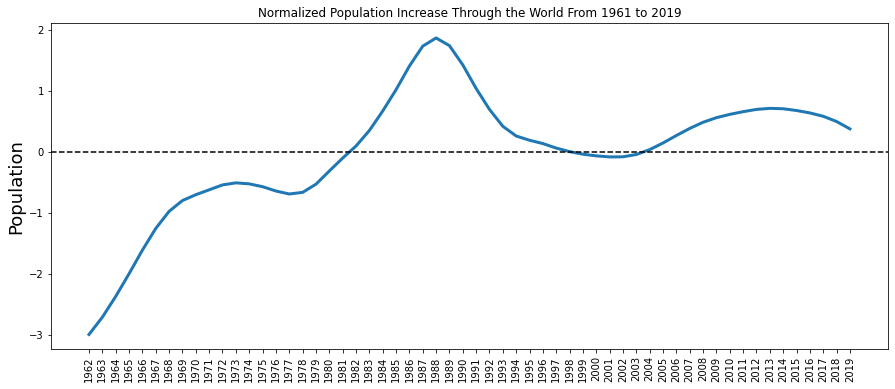

In [18]:
data.Population = data.Population.apply(lambda x: (x-average)/st_dev)
plt.figure(figsize = (15,6))
plt.plot(data["Population"], linewidth = 3)
plt.title("Normalized Population Increase Through the World From 1961 to 2019")
plt.xticks(rotation = 90)
plt.ylabel("Population", fontsize = 18)
plt.axhline(y = 0, linestyle = "--", color = "black" )
plt.show()

<a id='5'></a>
# VAR Model and Predictions

In [19]:
train_df = data.iloc[:int(0.8*len(data)),:]
test_df = data.iloc[int(0.8*len(data)):,:]

In [20]:
#model = VAR(train_df)
#x = model.select_order(maxlags=12) 
#x.summary()
# to optimize the lag number one can use this

In [21]:
model = VAR(train_df)
fitted_model = model.fit(maxlags = 10)
fitted_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 13, Jan, 2022
Time:                     04:43:19
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.60923
Nobs:                     36.0000    HQIC:                  -10.8119
Log likelihood:           146.056    FPE:                1.48131e-05
AIC:                     -11.4567    Det(Omega_mle):     5.90881e-06
--------------------------------------------------------------------
Results for equation Mean_Temperature_Increase
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                                 0.189456         0.041949            4.516           0.000
L1.Mean_Temperature_Increase         -1.383326         0.220776          

So our goal is to construct a function having lagged population terms to predict the future outcomes (or in this case predict the test data). Therefore we will use the first table. Prob stands for p-value and each term having prob <=0.05 can be considered as a serious (non-negligable) independent variable for the equation we want to build. The equation will look something like this (to predict the train part of course):

T(t) = 0.189456 + (-1.383326)xT(t-1) + (-1.036591)xT(t-2) + ....... + (1.123664)xP(t-10) + e(t)

for maxlag = 10

In [22]:
temperature_predictions = []
for timestamp in range(len(test_df)):
    train = data.iloc[timestamp: timestamp + len(train_df)]
    preds = VAR(train).fit().forecast(VAR(train).fit().y, steps = 2)
    temperature_predictions.append(preds[:,0])

temperature_predictions = np.array(temperature_predictions)

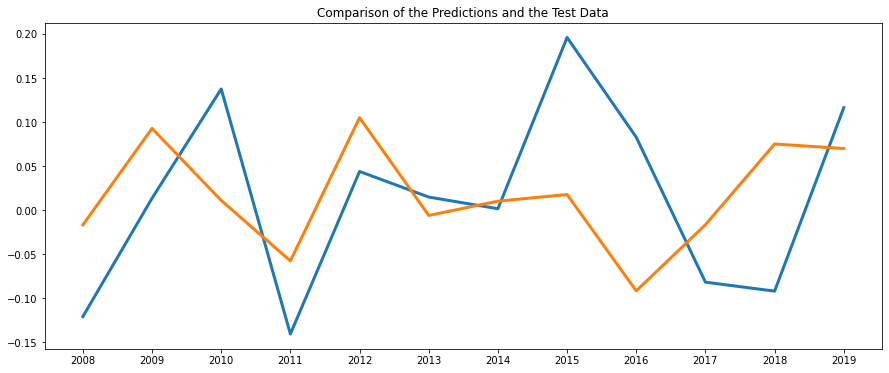

In [23]:
plt.figure(figsize = (15,6))
plt.plot(test_df["Mean_Temperature_Increase"], linewidth = 3)
plt.plot(temperature_predictions[:,0], linewidth = 3)
plt.title("Comparison of the Predictions and the Test Data")
plt.show()    


In [24]:
print("Mean Sqaured Error: ", mean_squared_error(test_df["Mean_Temperature_Increase"],temperature_predictions[:,0]))

Mean Sqaured Error:  0.011734955778719122


<a id='6'></a>
# Sources that I Utilized During Preparation

1. https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
1. "ritvikmath" channel found in Youtube
1. https://www.kaggle.com/jam74001/google-stock-prediction-var-model/notebook

Thanks...